In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from Fractures.DFN_Geo import *
from Flow_Solver.BEM.Coupling_Main import *
from Mesh_Generator.Mesh import *
from Visulization.ParaviewWriter import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
#1. Generator DFN using ADFNE
#DFN_Model=DFN_Geo('DFN_Generator\DFN_Data_Case2.dat')
DFN_Model=DFN_Geo('DFN_Generator\DFN_Data_Case4_frac3.dat')


#2. Write DFN into paraview
Writer=Paraview_Writer(fname='DFN_Case4')
Writer.SetInputDFN(DFN_Model)
Writer.Write()

[Input] Reading "DFN_Generator\DFN_Data_Case4_frac3.dat" DFN file....
Number of Points= 18
Number of Fractures= 3
Number of Intersections= 3
Fracture 0 has Intersections of  [0, 1]
Fracture 1 has Intersections of  [0, 2]
Fracture 2 has Intersections of  [1, 2]
[Output] Saved Geometry VTK file Results\DFN_Case4_geo.vtp) !


In [7]:
DFN_Model.SplitIntersection()

[Geometry] Fracture network splitting.....
   Edge Splitting.....11 new edges added. Elapsed Time=0.002998 secs
   Trace Splitting.....1 new traces added. Elapsed Time=0.384856 secs
[Output] Writing "Results\DFN_Data_Case4_frac3_Split.dat" DFN file....


In [14]:
vert,trace=DFN_Model.Get3DFracGeo(0)
print(vert)
print(trace)

[array([-2., -1.,  0.]), array([ 1., -1.,  0.]), array([1., 1., 0.]), array([-2.,  1.,  0.])]
[array([-1.,  0.,  0.]), array([1., 0., 0.]), array([ 0., -1.,  0.]), array([0., 1., 0.])]


In [27]:
DFN_Model.Get2DFractureGeo(0)

([array([0. , 0.6]), array([2. , 0.6]), array([2., 0.]), array([0., 0.])],
 array([[[1.14 , 0.036],
         [1.14 , 0.6  ]]]))

In [50]:
#Meshing
DFN_Meshes=DFN_Mesh("Non-Conforming",DFN_Model)

mesh_kwargs={'-algo': 'front3d'}
DFN_Meshes.GenerateMesh("Results\GmshInput.geo",mesh_size=0.1,gmsh_path=r'Mesh_Generator\Gmsh\gmsh.exe',**mesh_kwargs)#Windwos
Writer.SetInputMesh(DFN_Meshes)

Writer.Write()

[Output] Saved Gmsh geometry input file Results\GmshInput_gmsh.geo !
[Output] Run Gmsh Successfully! Saved mesh file Results\GmshInput_gmsh.msh!
[Output] Gmsh arguments=  -3 Results\GmshInput_gmsh.geo -o Results\GmshInput_gmsh.msh -algo front3d 
[Output] Saved Geometry VTK file Results\DFN_Case2_geo.vtp) !
[Output] Saved Mesh VTK file Results\DFN_Case2.vtu) !


Generating Mesh......
Found Intersection-Edge 0 Trace 0 @ (1.14, 0.6)
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:15 E-T(13,2)
[Mesh] Number of Nodes:45 E-T(39-6)
Found Intersection-Edge 3 Trace 0 @ (0.0, 1.14)
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:15 E-T(13,2)
[Mesh] Number of Nodes:45 E-T(39-6)
Total DOF= 90
Set up boundary condtions......
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(5, 0.0)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(5, 0.0)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(0, 100)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(0, 90)]


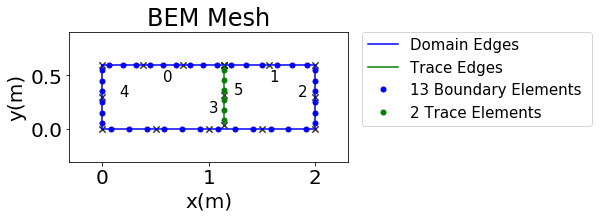

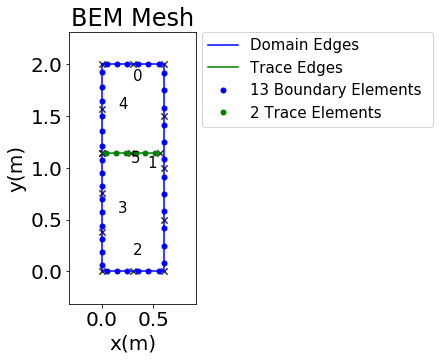

Set up connection table between domains......
Done!


In [12]:
#2. DDM-based Boundary element method solver
Flow_Solver=DDM_Solver()
Flow_Solver.Link2DFN(DFN_Model,Ne_edge=10,h_trace=0.5)

#ConvergenceData2=Flow_Solver.Solve_Iter(Method="P-DD-New",TOL=1e-5,max_iter=5)

In [6]:
LineSegIntersect2(line1=((0,0.2),(2,0.2)),line2=((1.,0.036),(1.14,0.20)))

False

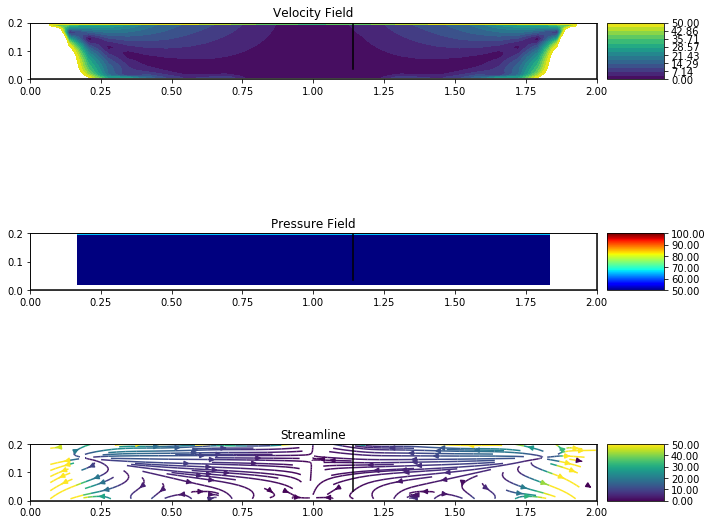

In [16]:
xx=Flow_Solver.BEMobjs[0].PostProcess.plot_Solution()

Generating Mesh......
Total DOF= 106
Set up boundary condtions......


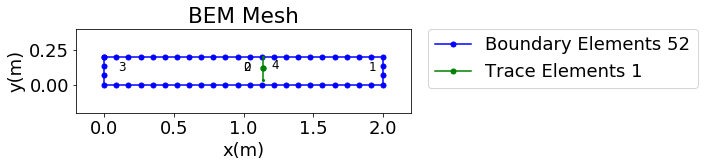

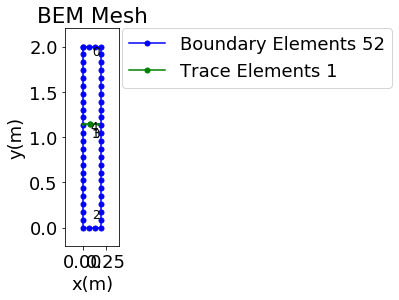

Set up connection table between domains......
Done!
System Condition Number is 208.57278639498023 104.28639319749011
Warning! Negative alpha!
Warning! Negative alpha!
Warning! Negative alpha!
Warning! Negative alpha!
Warning! Negative alpha!
Converged at 11 Steps! TOL= 1e-05
Dirichelt [0.00225384]
Neumann [0.00332191]


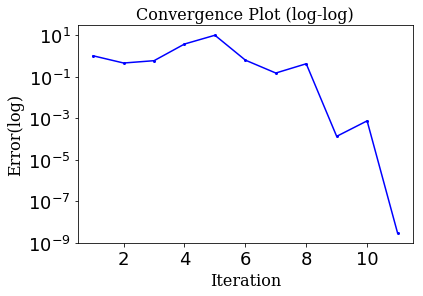

In [18]:
#2. DDM-based Boundary element method solver
Flow_Solver=DDM_Solver()
Flow_Solver.Link2DFN(DFN_Model,Ne_edge=50,h_trace=0.5)

ConvergenceData1=Flow_Solver.Solve_Iter(Method="P-RR-New",TOL=1e-5,max_iter=1000)

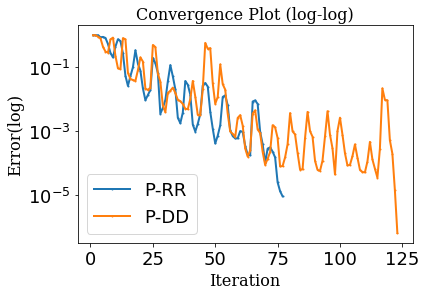

In [46]:
#Compaute the convergence plot
Datas=[ConvergenceData1,ConvergenceData2]
Names=["P-RR","P-DD"]
Flow_Solver.Compare_convergence(Datas,Names)

#Flow_Solver.BEMobjs[1].plot_Mesh()
#Flow_Solver.BEMobjs[2].plot_Mesh()
#Flow_Solver.BEMobjs[3].plot_Mesh()

In [7]:
#Flow_Solver.Solve_Iter(Method="CG-NN",TOL=1e-7,alpha=0.2,opt=1)

In [135]:
#Flow_Solver.Solve_Iter(Method="CG-RR",TOL=1e-7,alpha=0.2,opt=1)

In [8]:
#4. Post-processing
#Meshing
DFN_Meshes=DFN_Mesh("Non-Conforming",DFN_Model)

In [9]:
mesh_kwargs={'-algo': 'front3d'}
DFN_Meshes.GenerateMesh("GmshInput.geo",mesh_size=0.3,gmsh_path=r'gmsh.exe',**mesh_kwargs)#Windwos
#DFN_Meshes.GenerateMesh("GmshInput.geo",mesh_size=0.3,gmsh_path=r'.\gmsh',**mesh_kwargs) #Linux
#DFN_Meshes.GenerateMesh("GmshInput.geo",mesh_size=None,**mesh_kwargs)

[Output] Saved Gmsh geometry input file GmshInput_gmsh.geo !
[Output] Run Gmsh Successfully! Saved mesh file GmshInput_gmsh.msh!
[Output] Gmsh arguments=  -3 GmshInput_gmsh.geo -o GmshInput_gmsh.msh -algo front3d 


In [57]:
Writer=Paraview_Writer(fname='DFN_Case2')
Writer.SetInputDFN(DFN_Model)
Writer.SetInputMesh(DFN_Meshes)

Writer.AppendCellData('FractureMarkerID',DFN_Meshes.FracMarkerID)

Pressures=Flow_Solver.GetFracsPressure(DFN_Meshes)
Writer.AppendPointData('Pressure',Pressures)
Writer.Write()

[Output] Saved VTK file Results\DFN_Case2_geo.vtp !
[Output] Saved Geometry/Mesh VTK file (Results\DFN_Case2_geo.vtp,Results\DFN_Case2.vtu) !


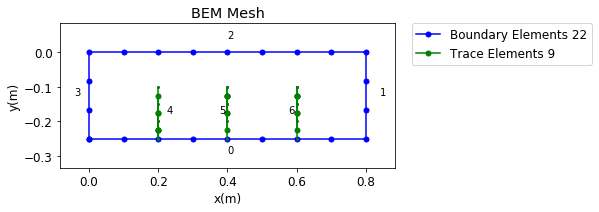

In [15]:
Flow_Solver.BEMobjs[0].plot_Mesh()

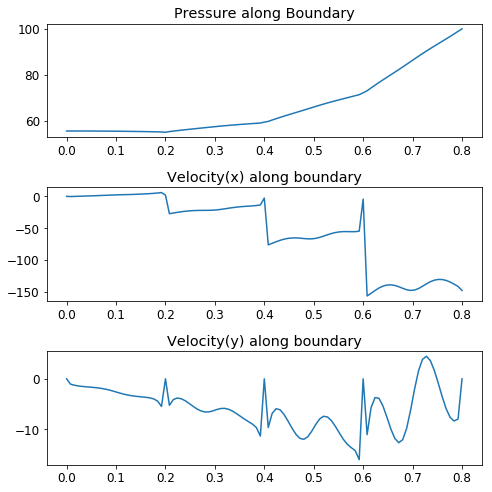

([0.0,
  0.008,
  0.016,
  0.024,
  0.032,
  0.04,
  0.048,
  0.056,
  0.064,
  0.07200000000000001,
  0.08,
  0.088,
  0.096,
  0.10400000000000001,
  0.112,
  0.12,
  0.128,
  0.136,
  0.14400000000000002,
  0.152,
  0.16,
  0.168,
  0.176,
  0.184,
  0.192,
  0.2,
  0.20800000000000002,
  0.216,
  0.224,
  0.232,
  0.24,
  0.248,
  0.256,
  0.264,
  0.272,
  0.28,
  0.28800000000000003,
  0.296,
  0.304,
  0.312,
  0.32,
  0.328,
  0.336,
  0.34400000000000003,
  0.352,
  0.36,
  0.368,
  0.376,
  0.384,
  0.392,
  0.4,
  0.40800000000000003,
  0.41600000000000004,
  0.424,
  0.432,
  0.44,
  0.448,
  0.456,
  0.464,
  0.47200000000000003,
  0.48,
  0.488,
  0.496,
  0.504,
  0.512,
  0.52,
  0.528,
  0.536,
  0.544,
  0.552,
  0.56,
  0.5680000000000001,
  0.5760000000000001,
  0.584,
  0.592,
  0.6,
  0.608,
  0.616,
  0.624,
  0.632,
  0.64,
  0.648,
  0.656,
  0.664,
  0.672,
  0.68,
  0.6880000000000001,
  0.6960000000000001,
  0.704,
  0.712,
  0.72,
  0.728,
  0.736,
  0.744,

In [93]:
Flow_Solver.BEMobjs[0].plot_Solution_overline((0,-0.2),(0.8,-0.2))

In [91]:
Pts=(0.2,-0.2)
Flow_Solver.BEMobjs[0].get_Solution(Pts)

[54.89402067] [-2.07029052] [0.]


(54.894020668364085, 2.070290524915583, -0.0)

In [4]:
string = ""
string += 'Point(%d) = {%f,%f,%f,%f};\n' % (0,1,2,3)

TypeError: not enough arguments for format string